<a href="https://colab.research.google.com/github/MX-FOR/Gaussian-Processes-Regression/blob/main/Gaussian_Processes_Regression_(Examples).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gaussian Processes Regression





Dados algunos puntos de datos observados, encontrar una función que represente el conjunto de datos lo más cerca posible, y luego utilizar la función para hacer predicciones en nuevos puntos de datos. 

La regresión puede realizarse con polinomios, y es habitual que haya más de una función posible que se ajuste a los datos observados. 

Además de obtener predicciones mediante la función, también queremos saber la certeza de estas predicciones, la GP se puede utilizar para hacer predicciones en nuevos puntos de datos y nos puede decir qué tan ciertas son estas predicciones. 

<img src="https://github.com/jwangjie/Gaussian-Process-be-comfortable-using-it/blob/master/img/gpr_animation_wide.gif?raw=1" width="1000"/> 







# Distribución Gaussiana Normal 


Se dice que una variable aleatoria $X$ está normalmente distribuida con media $\mu$ y varianza $\sigma^2$ si su función de densidad de probabilidad (PDF) es 

$$ P_X(x) = \frac{1}{\sqrt{2 \pi} \sigma} exp{\left(-\frac{{\left(x - \mu \right)}^{2}}{2 \sigma^{2}}\right)}$$

Aquí, $X$ representa variables aleatorias y $x$ es el argumento real. La distribución gaussiana o normal de $X$ se suele representar por $ P(x) ~ \sim\mathcal{N}(\mu, \sigma^2)$. 

A continuación se representa una PDF gaussiana de $1-D$. Generamos `n` número de puntos de muestra al azar de un $1-D$ distribución gaussiana en el eje `x`. 


In [ ]:
from __future__ import division
from scipy.stats import norm


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


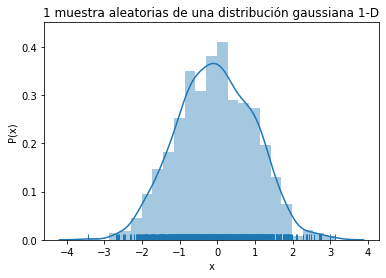

In [ ]:
# 1-D gaussian
n = 1         # n indep  1-D gaussian 
m= 1000       # m var en 1-D gaussian 
f_random = np.random.normal(size=(n, m)) 

#print(f_random.shape)

for i in range(n):
    #sns.distplot(f_random[i], hist=True, rug=True, vertical=True, color="orange")
    sns.distplot(f_random[i], hist=True, rug=True)

plt.title('1 muestra aleatorias de una distribución gaussiana 1-D')
plt.xlabel('x')
plt.ylabel('P(x)')
plt.show()

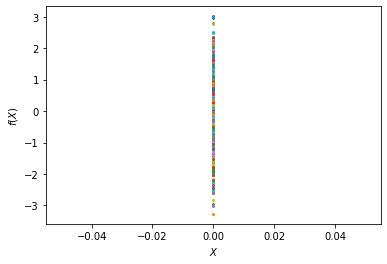

In [ ]:
n = 1          # n indep  1-D gaussian 
m = 1000       # m var en 1-D gaussian  
f_random = np.random.normal(size=(n, m))

Xshow = np.linspace(0, 1, n).reshape(-1,1)   # n  test points en el rango de (0, 1)

plt.clf()
plt.plot(Xshow, f_random, 'o', linewidth=1, markersize=1, markeredgewidth=2)
plt.xlabel('$X$')
plt.ylabel('$f(X)$')
plt.show()

Está claro que el vector $X_1$ es gaussiano. Parece que no hemos hecho más que trazar verticalmente los puntos del vector $X_1$. 

A continuación, podemos trazar múltiples gaussianas independientes en las coordenadas $X-Y$. Por ejemplo, poner el vector $X_1$ en $X = 0$ y otro vector $X_2$ en $X = 1$. 

Conectemos los puntos de $X_1$ y $X_2$ mediante líneas. Por ahora, sólo generamos 3 puntos aleatorios para $X_1$ y $X_2$, y luego los unimos como 10 líneas. Tengamos en cuenta que estos 3 puntos generados al azar son gaussianos. 

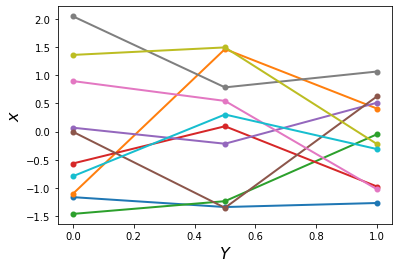

In [ ]:
n = 3
m = 10
f_random = np.random.normal(size=(n, m))

Xshow = np.linspace(0, 1, n).reshape(-1,1)   # n number test points in the range of (0, 1)

plt.clf()
plt.plot(Xshow, f_random, '-o', linewidth=2, markersize=4, markeredgewidth=2)
plt.xlabel(r'$Y$', fontsize = 16)
plt.ylabel(r'$x$', fontsize = 16)

# plt.show()
# plt.savefig('1d_random.png', bbox_inches='tight', dpi=600)
plt.savefig('random_x1_x2')

Volviendo a pensar en la regresión. Estas líneas parecen **funciones** para cada par de puntos. Por otra parte, el gráfico también parece como si estuviéramos muestreando la región $[0, 1]$ con 10 funciones lineales aunque sólo haya dos puntos en cada línea. 

Desde la perspectiva del muestreo, el dominio $[0, 1]$ es nuestra región de interés, es decir, la región específica en la que hacemos nuestra regresión. Este muestreo parece aún más claro si generamos más gaussianas independientes y conectamos los puntos en orden por líneas. 

Así, las funciones que conectan gaussianas independientes no son adecuadas para la regresión, necesitamos gaussianas que estén correlacionadas entre sí. ¿Cómo describir la gaussiana conjunta? Gaussiana multivariable.  

# Distribución Normal multivarianble (MVN)

## Graficar un MVN

En algunas situaciones, un sistema (conjunto de datos) tiene que ser descrito por más de más variables de características $[x_1, x_2, \ldots, x_n]$, y estas variables están correlacionadas. Si queremos modelar los datos de una sola vez como gaussianas, necesitamos gaussianas multivariantes. 

Formalmente, la gaussiana multivariante se expresa como 

<img src="https://github.com/jwangjie/Gaussian-Process-be-comfortable-using-it/blob/master/img/mul_var_gaussian.png?raw=1" width="400"/>

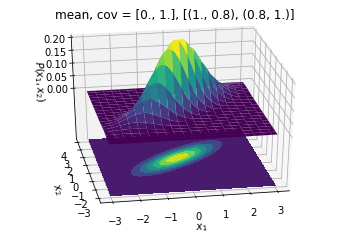

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

# R2 distribution sera sobre las variables x, y 

N = 60
X = np.linspace(-3, 3, N)
Y = np.linspace(-3, 4, N)
X, Y = np.meshgrid(X, Y)

# vector media y matriz de covarianza 
mu = np.array([0., 1.])
Sigma = np.array([[ 1. , 0.8], [0.8,  1.]])

# Pack X , Y en un vector de 3 dim 
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

def multivariate_gaussian(pos, mu, Sigma):
  
    """Devuelve la distribución gaussiana multivariante en el array pos.

    pos es un array construido empaquetando los arrays de malla de las variables
    x_1, x_2, x_3, ..., x_k en su _última_ dimensión.

    """
    n = mu.shape[0]
    Sigma_det = np.linalg.det(Sigma)
    Sigma_inv = np.linalg.inv(Sigma)
    N = np.sqrt((2*np.pi)**n * Sigma_det)
    # This einsum call calculates (x-mu)T.Sigma-1.(x-mu) in a vectorized
    # way across all the input variables.
    fac = np.einsum('...k,kl,...l->...', pos-mu, Sigma_inv, pos-mu)

    return np.exp(-fac / 2) / N

# The distribution on the variables X, Y packed into pos.
Z = multivariate_gaussian(pos, mu, Sigma)

# Create a surface plot and projected filled contour plot under it.
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, rstride=3, cstride=3, linewidth=1, antialiased=True,
                cmap=cm.viridis)

cset = ax.contourf(X, Y, Z, zdir='z', offset=-0.2, cmap=cm.viridis)

# Adjust the limits, ticks and view angle
ax.set_zlim(-0.2,0.2)
ax.set_zticks(np.linspace(0,0.2,5))
ax.view_init(30, -100)

ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
ax.set_zlabel(r'$P(x_1, x_2)$')

plt.title('mean, cov = [0., 1.], [(1., 0.8), (0.8, 1.)]')
plt.savefig('2d_gaussian3D_0.8.png', dpi=600)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


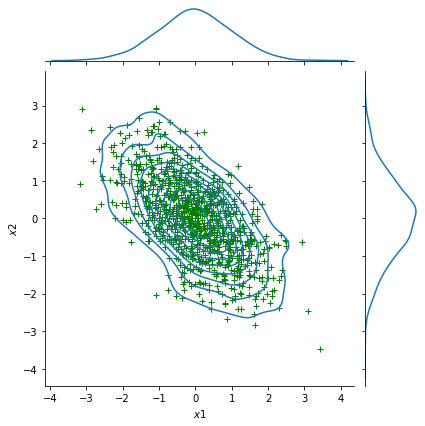

In [ ]:
import pandas as pd
import seaborn as sns

mean, cov = [0., 0.], [(1., -0.6), (-0.6, 1.)]
data = np.random.multivariate_normal(mean, cov, 1000)
df = pd.DataFrame(data, columns=["x1", "x2"])
g = sns.jointplot("x1", "x2", data=df, kind="kde")

#(sns.jointplot("x1", "x2", data=df).plot_joint(sns.kdeplot))

g.plot_joint(plt.scatter, c="g", s=30, linewidth=1, marker="+")

#g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$x1$", "$x2$");

#g.ax_joint.legend_.remove()
plt.show()

Otro Ejemplo : [Multivariante Gaussians and Mixtures of Gaussians (MoG)](https://www.cs.toronto.edu/~guerzhoy/411/lec/W08/MoG.html).

## Matematicas

En primer lugar, de nuevo, volviendo a nuestra tarea de regresión. Hay una función $\mathbf{f}$ que estamos tratando de modelar dado un conjunto de puntos de datos $\mathbf{X}$ (datos trainig / datos observados existentes) de la función $\mathbf{f}$ desconocida. Los métodos tradicionales de aprendizaje automático de regresión no lineal suelen dar una función que considera que se ajusta mejor a estas observaciones. Pero, como se muestra al principio, puede haber más de un funcitons ajuste de las observaciones igualmente bien. 

En segundo lugar, repasemos lo que obtuvimos de MVN. Tenemos la sensación de que cuando la dimensión de la gaussiana es infinita, podemos muestrear toda la región de interés con funciones aleatorias. Estas funciones aleatorias infinitas son MVN porque es nuestra suposición (a priori). Más formalmente, la distribución a priori de estas funciones aleatorias infinitas son MVN. La distribución a priori que representa el tipo de salidas $\mathbf{f}$ que esperamos ver sobre algunas entradas $\mathbf{x}$ sin siquiera observar ningún dato. 

Cuando tenemos puntos de observación, en lugar de infinitas funciones aleatorias, sólo mantenemos las funciones que se ajustan a estos puntos. Ahora tenemos nuestra posterior, la creencia actual basada en las observaciones existentes. Cuando tenemos más puntos de observación, usamos nuestra posterior anterior como nuestra anterior, usamos estas nuevas observaciones para actualizar nuestra posterior.  

Esto es un **proceso gaussiano**. 

Un proceso gaussiano es una distribución de probabilidad sobre posibles funciones que se ajustan a un conjunto de puntos.

Dado que tenemos la distribución de probabilidad sobre todas las funciones posibles, podemos cacular **la media como la función**, y cacular la varianza para mostrar la confianza cuando hacemos predicciones usando la función. 

Hay que tener en cuenta, 
* La función (posterior) se actualiza con nuevas observaciones. 
* La media calculada por la distribución posterior de las posibles funciones es la función utilizada para la regresión. 

La función se modela mediante una gaussiana multivariable como 

$$p(\mathbf{f} \lvert, \mathbf{X}) = \mathcal{N}(\mathbf{f} \lvert, \boldsymbol\mu, \mathbf{K})$$

donde $\mathbf{f} = (f(\mathbf{x}_1),...,f(\mathbf{x}_n))$, $\boldsymbol\mu = (m(\mathbf{x}_1),...,m(\mathbf{x}_n))$ y $K_{ij} = \kappa(\mathbf{x}_i,\mathbf{x}_j)$. $m$ es la función de la media y es común usar $m(\mathbf{x}) = 0$ ya que las GPs son lo suficientemente flexibles como para modelar la media de forma arbitraria. $\kappa$ es una *función de núcleo* o *función de covarianza* definida positiva. Así, un proceso gaussiano es una distribución sobre funciones cuya forma (suavidad, ...) está definida por $\mathbf{K}$. Si los puntos $\mathbf{x}_i$ y $\mathbf{x}_j$ se consideran similares por el kernel los valores de la función en estos puntos, $f(\mathbf{x}_i)$ y $f(\mathbf{x}_j)$, se puede esperar que sean similares también. 

Así, tenemos observaciones, y hemos estimado funciones $\mathbf{f}$ con estas observaciones. Ahora digamos que tenemos algunos nuevos puntos $\mathbf{X}_*$ donde queremos predecir $f(\mathbf{X}_*)$.

<img src="https://github.com/jwangjie/Gaussian-Process-be-comfortable-using-it/blob/master/img/mvn.png?raw=1" width="250"/> 

## Kernel

Queremos suavizar las funciones de muestreo definiendo las funciones de covarianza. Teniendo en cuenta el hecho de que cuando dos vectores son similares, su valor de salida del producto punto es alto. Es muy claro ver esto en la ecuación del producto de punto $A\,B = AB\,cos\theta$, donde $\theta$ es el ángulo entre dos vectores. Si un algoritmo se define únicamente en términos de productos internos en el espacio de entrada, entonces puede ser levantado en el espacio de características mediante la sustitución de las ocurrencias de los productos internos por $k(x,\ x^\prime)$; llamamos $k(\bullet,\bullet)$ una función del núcleo

Una función de covarianza popular (también conocida como función kernel) es el kernel exponencial cuadrado, también llamado kernel de función de base radial (RBF) o kernel gaussiano, definido como 



$$ cov(x_i, x_j)=\exp\left(-~\frac{(x_i-x_j)^2}{2}\right)$$

Vamos a volver a trazar 20 gaussianas independientes y conectar los puntos en orden por las líneas. En lugar de generar 20 gaussianas independientes antes, hacemos el trazado de una gaussiana $20-D$ con una matriz de convarianza de identidad. 

In [ ]:
# Define the kernel
def kernel(a, b):
    sqdist = np.sum(a**2,axis=1).reshape(-1,1) + np.sum(b**2,1) - 2*np.dot(a, b.T)
    # np.sum( ,axis=1) means adding all elements columnly; .reshap(-1, 1) add one dimension to make (n,) become (n,1)
    return np.exp(-.5 * sqdist)

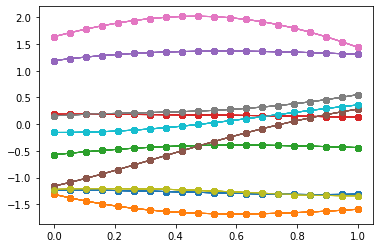

In [ ]:
n = 20  
m = 10

Xshow = np.linspace(0, 1, n).reshape(-1,1)   # n number test points in the range of (0, 1)

K_ = kernel(Xshow, Xshow)                  # k(x_star, x_star)        

mean = np.zeros(n)
cov = np.eye(n)

f_prior = np.random.multivariate_normal(mean, K_, m).T

plt.clf()

Xshow = np.linspace(0, 1, n).reshape(-1,1)   # n number test points in the range of (0, 1)

for i in range(m):
    plt.plot(Xshow, f_prior, '-o', linewidth=1)
    
# plt.title('10 samples of the 20-D gaussian kernelized prior')
# plt.show()
plt.savefig('20d_gaussian_kernel_prior')

Obtenemos líneas mucho más suaves y se parecen más a las funciones. Cuando la dimensión de la gaussiana se hace más grande, no hay necesidad de conectar puntos. Cuando la dimensión se convierte en infinito, hay un punto representa cualquier entrada posible. Vamos a trazar `m=200` muestras de `n=200`$-D$ Gaussian para obtener una sensación de funciones con parámetros infinitos.  

<Figure size 432x288 with 0 Axes>

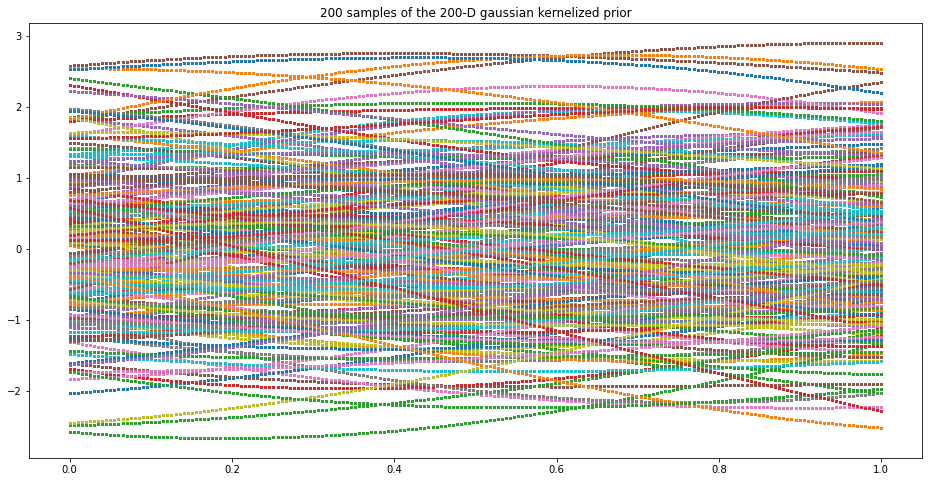

In [ ]:
n = 200         
m = 200

Xshow = np.linspace(0, 1, n).reshape(-1,1)   

K_ = kernel(Xshow, Xshow)                    # k(x_star, x_star)        

mean = np.zeros(n)
cov = np.eye(n)

f_prior = np.random.multivariate_normal(mean, K_, m).T

plt.clf()
#plt.plot(Xshow, f_prior, '-o')
Xshow = np.linspace(0, 1, n).reshape(-1,1)   # n number test points in the range of (0, 1)

plt.figure(figsize=(16,8))
for i in range(m):
    plt.plot(Xshow, f_prior, 'o', linewidth=1, markersize=2, markeredgewidth=1)
    
plt.title('200 samples of the 200-D gaussian kernelized prior')
#plt.axis([0, 1, -3, 3])
plt.show()
#plt.savefig('priorT.png', bbox_inches='tight', dpi=300)

Como podemos ver arriba, cuando aumentamos la dimensión de la gaussiana hasta el infinito, podemos muestrear todos los puntos posibles en nuestra región de interés. 

Una gran animación de visualización de la covarianza de dos y cuatro puntos de las "funciones" respectivamente

<img src="https://github.com/jwangjie/Gaussian-Process-be-comfortable-using-it/blob/master/img/2points_covariance.gif?raw=1" width="600"/>
      	  
<img src="https://github.com/jwangjie/Gaussian-Process-be-comfortable-using-it/blob/master/img/4points_covariance.gif?raw=1" width="600"/>

Para generar muestras aleatorias correlacionadas normalmente distribuidas, se pueden generar primero muestras no correlacionadas y luego multiplicarlas
por una matriz *L* tal que $L L^T = K$, donde *K* es la matriz de covarianza deseada. *L* puede crearse, por ejemplo, utilizando 
la descomposición Cholesky de *K*.

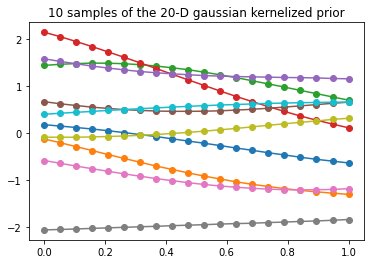

In [ ]:
n = 20      
m = 10

Xshow = np.linspace(0, 1, n).reshape(-1,1)  # n number test points in the range of (0, 1)

K_ = kernel(Xshow, Xshow)                

L = np.linalg.cholesky(K_ + 1e-6*np.eye(n))


f_prior = np.dot(L, np.random.normal(size=(n,m)))

plt.clf()
plt.plot(Xshow, f_prior, '-o')
plt.title('10 samples of the 20-D gaussian kernelized prior')
plt.show()

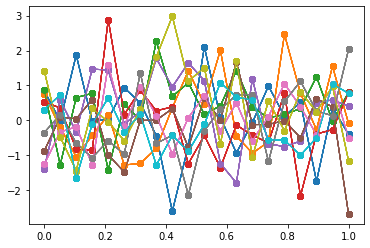

In [ ]:
n = 20 
m = 10

mean = np.zeros(n)
cov = np.eye(n)

f_prior = np.random.multivariate_normal(mean, cov, m).T

plt.clf()

#plt.plot(Xshow, f_prior, '-o')
Xshow = np.linspace(0, 1, n).reshape(-1,1)   # n number test points in the range of (0, 1)

for i in range(m):
    plt.plot(Xshow, f_prior, '-o', linewidth=1)
    
# plt.title('10 samples of the 20-D gaussian prior')
# plt.show()
plt.savefig('20d_gaussian_prior')

# Ejemplo simple


Hacemos el ejemplo de regresión entre -5 y 5. Los puntos de datos de observación (conjunto de datos de seguimiento) se generan a partir de una distribución uniforme entre -5 y 5. Esto significa que cualquier valor de punto dentro del intervalo dado [-5, 5] tiene la misma probabilidad de ser dibujado por el uniforme. Las funciones se evaluarán en `n` puntos espaciados uniformemente entre -5 y 5. Hacemos esto para mostrar una función continua para la regresión en nuestra región de interés [-5, 5]. Este es un ejemplo simple para hacer la regresión GP. Asume una media cero de GP Prior. 

In [ ]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

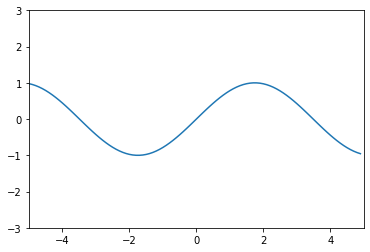

In [ ]:
# This is the true unknown function we are trying to approximate
f = lambda x: np.sin(0.9*x).flatten()
#f = lambda x: (0.25*(x**2)).flatten()
x = np.arange(-5, 5, 0.1)

plt.plot(x, f(x))
plt.axis([-5, 5, -3, 3])
plt.show()

In [ ]:
# Define the kernel
def kernel(a, b):
    kernelParameter_l = 0.1
    kernelParameter_sigma = 1.0
    sqdist = np.sum(a**2,axis=1).reshape(-1,1) + np.sum(b**2,1) - 2*np.dot(a, b.T)
    # np.sum( ,axis=1) means adding all elements columnly; .reshap(-1, 1) add one dimension to make (n,) become (n,1)
    return kernelParameter_sigma*np.exp(-.5 * (1/kernelParameter_l) * sqdist)

Utilizamos un Kernel Exponencial Cuadrado general, también llamado Kernel de Función de Base Radial o Kernel Gaussiano:

$$
\kappa(\mathbf{x}_i,\mathbf{x}_j) = \sigma_f^2 \exp(-\frac{1}{2l^2}
  (\mathbf{x}_i - \mathbf{x}_j)^T
  (\mathbf{x}_i - \mathbf{x}_j))
$$

donde $\sigma_f$ y $l$ son hiperparámetros. Se puede encontrar más información sobre los hiperparámetros después de los códigos. 

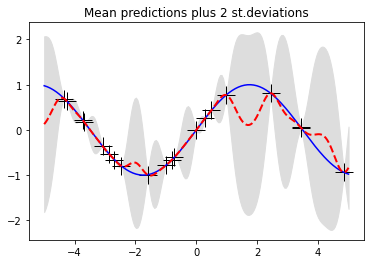

In [ ]:
# Sample some input points and noisy versions of the function evaluated at
# these points. 
N = 20         # number of existing observation points (training points).
n = 200        # number of test points.
s = 0.00005    # noise variance.

X = np.random.uniform(-5, 5, size=(N,1))     # N training points 
y = f(X) + s*np.random.randn(N)

K = kernel(X, X)
L = np.linalg.cholesky(K + s*np.eye(N))     # line 1 

# points we're going to make predictions at.
Xtest = np.linspace(-5, 5, n).reshape(-1,1)

# compute the mean at our test points.
Lk = np.linalg.solve(L, kernel(X, Xtest))   # k_star = kernel(X, Xtest), calculating v := l\k_star
mu = np.dot(Lk.T, np.linalg.solve(L, y))    # \alpha = np.linalg.solve(L, y) 

# compute the variance at our test points.
K_ = kernel(Xtest, Xtest)                  # k(x_star, x_star)        
s2 = np.diag(K_) - np.sum(Lk**2, axis=0)   
s = np.sqrt(s2)

# PLOTS:
plt.figure(1)
plt.clf()
plt.plot(X, y, 'k+', ms=18)
plt.plot(Xtest, f(Xtest), 'b-')
plt.gca().fill_between(Xtest.flat, mu-2*s, mu+2*s, color="#dddddd")
plt.plot(Xtest, mu, 'r--', lw=2)
#plt.savefig('predictive.png', bbox_inches='tight', dpi=300)
plt.title('Mean predictions plus 2 st.deviations')
plt.show()
#plt.axis([-5, 5, -3, 3])

Graficamos `m=40` muestras del Proceso Gaussiano posterior junto con la función media para la predicción y los puntos de datos de observación (conjunto de datos de entrenamiento). Está claro que todas las funciones posteriores colapsan en todos los puntos de observación. 

<Figure size 432x288 with 0 Axes>

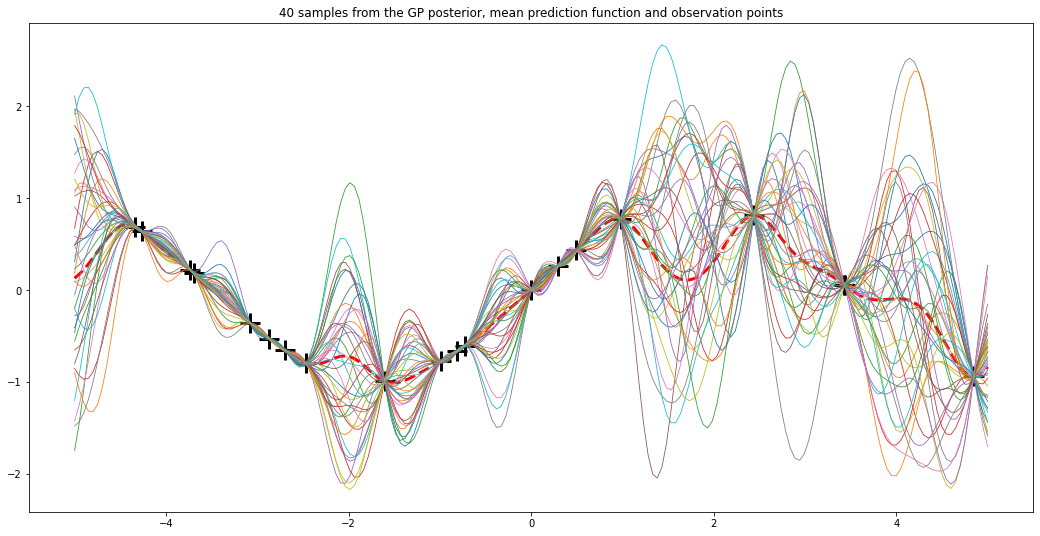

In [ ]:
# draw samples from the posterior at our test points.
L = np.linalg.cholesky(K_ + 1e-6*np.eye(n) - np.dot(Lk.T, Lk))
f_post = mu.reshape(-1,1) + np.dot(L, np.random.normal(size=(n,40)))  # size=(n, m), m shown how many posterior  
plt.figure(3)
plt.clf()
plt.figure(figsize=(18,9))
plt.plot(X, y, 'k+', markersize=20, markeredgewidth=3)
plt.plot(Xtest, mu, 'r--', linewidth=3)
plt.plot(Xtest, f_post, linewidth=0.8)
plt.title('40 samples from the GP posterior, mean prediction function and observation points')
plt.show()
#plt.axis([-5, 5, -3, 3])
#plt.savefig('post.png', bbox_inches='tight', dpi=600)

# Gaussian Process

In [ ]:
# import all packages and set plots to be embedded inline

!pip install PyDOE

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.optimize import Bounds
from scipy.linalg import cho_solve
from pyDOE import lhs
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for PyDOE: filename=pyDOE-0.3.8-py3-none-any.whl size=18184 sha256=fd52c345bb38688c6a9ec4bb734139cd15b9c8b3c7a7989e65b7804202d9cfd5
  Stored in directory: /root/.cache/pip/wheels/83/ce/8a/87b25c685bfeca1872d13b8dc101e087a9c6e3fb5ebb47022a
Successfully built PyDOE


## Correlation length


In [ ]:
# Define parameter range and theta values
shift = np.linspace(-2, 2, 100)
thetas = np.array([0.1,1,10])

# Calculate correlation under various theta values
corrs = [np.exp(-theta*shift**2) for theta in thetas]

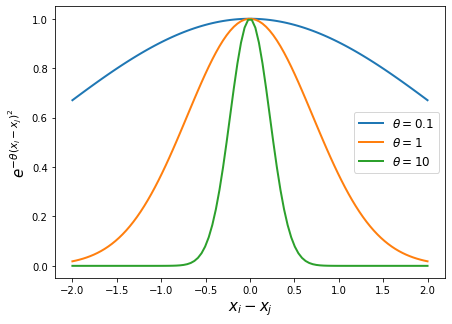

In [ ]:
# Visualize results
fig, ax = plt.subplots(figsize=(7,5))

# Define labels
labels = [r'$\theta=0.1$', r'$\theta=1$', r'$\theta=10$']

for i in range(thetas.shape[0]):
    ax.plot(shift, corrs[i], label=labels[i], lw=2)
ax.legend(fontsize=12)
ax.set_xlabel(r'$x_i-x_j$', fontsize=15)
ax.set_ylabel(r'$e^{-\theta (x_i-x_j)^2}$', fontsize=15);

## Gaussian Process class


In [ ]:
class GaussianProcess:
    """A Gaussian Process class that trains and exploits 
    a Gaussian Process model"""
    
    def __init__(self, n_restarts, optimizer):
        """Initialize a Gaussian Process model
        
        Input
        ------
        n_restarts: number of restarts of the local optimizer
        optimizer: algorithm of local optimization"""
        
        self.n_restarts = n_restarts
        self.optimizer = optimizer
        
       
    def Corr(self, X1, X2, theta):
        """Construct the correlation matrix between X1 and X2
        
        Input
        -----
        X1, X2: 2D arrays, shape (n_samples, n_features)
        theta: array, correlation legnths for different dimensions
        
        Output
        ------
        K: the correlation matrix
        """
        K = np.zeros((X1.shape[0], X2.shape[0]))
        for i in range(X1.shape[0]):
            K[i,:] = np.exp(-np.sum(theta*(X1[i,:]-X2)**2, axis=1))
            
        return K
 
       
    def Neglikelihood(self, theta):
        """Negative likelihood function
        
        Input
        -----
        theta: array, correlation legnths for different dimensions
        
        Output
        ------
        LnLike: likelihood value"""
        
        theta = 10**theta    # Correlation length
        n = self.X.shape[0]  # Number of training instances
        one = np.ones((n,1))      # Vector of ones
        
        # Construct correlation matrix
        K = self.Corr(self.X, self.X, theta) + np.eye(n)*1e-10
        L = np.linalg.cholesky(K)
        #inv_K = np.linalg.inv(K)   # Inverse of correlation matrix
        
        # Mean estimation
        mu = (one.T @ (cho_solve((L, True), self.y))) / \
            (one.T @ (cho_solve((L, True), one)))
        # mu = (one.T @ inv_K @ self.y)/ (one.T @ inv_K @ one)
        
        # Variance estimation
        SigmaSqr = (self.y-mu*one).T @ (cho_solve((L, True), self.y-mu*one)) / n
        # SigmaSqr = (self.y-mu*one).T @ inv_K @ (self.y-mu*one) / n
        
        # Compute log-likelihood
        LnDetK = 2*np.sum(np.log(np.abs(np.diag(L))))
        # DetK = np.linalg.det(K)
        LnLike = -(n/2)*np.log(SigmaSqr) - 0.5*LnDetK
        
        # Update attributes
        self.K, self.L, self.mu, self.SigmaSqr = K, L, mu, SigmaSqr
        
        return -LnLike.flatten()
        
        
    def fit(self, X, y):
        """GP model training
        
        Input
        -----
        X: 2D array of shape (n_samples, n_features)
        y: 2D array of shape (n_samples, 1)
        """
        
        self.X, self.y = X, y
        lb, ub = -3, 2
        
        # Generate random starting points (Latin Hypercube)
        lhd = lhs(self.X.shape[1], samples=self.n_restarts)
        
        # Scale random samples to the given bounds 
        initial_points = (ub-lb)*lhd + lb
        
        # Create A Bounds instance for optimization
        bnds = Bounds(lb*np.ones(X.shape[1]),ub*np.ones(X.shape[1]))
        
        # Run local optimizer on all points
        opt_para = np.zeros((self.n_restarts, self.X.shape[1]))
        opt_func = np.zeros((self.n_restarts, 1))
        for i in range(self.n_restarts):
            res = minimize(self.Neglikelihood, initial_points[i,:], method=self.optimizer,
                bounds=bnds)
            opt_para[i,:] = res.x
            opt_func[i,:] = res.fun
        
        # Locate the optimum results
        self.theta = opt_para[np.argmin(opt_func)]
        
        # Update attributes
        self.NegLnlike = self.Neglikelihood(self.theta)
        
    
    def predict(self, X_test):
        """GP model predicting
        
        Input
        -----
        X_test: test set, array of shape (n_samples, n_features)
        
        Output
        ------
        f: GP predictions
        SSqr: Prediction variances"""
        
        n = self.X.shape[0]
        one = np.ones((n,1))
        
        # Construct correlation matrix between test and train data
        k = self.Corr(self.X, X_test, 10**self.theta)
        
        # Mean prediction
        f = self.mu + k.T @ (cho_solve((self.L, True), self.y-self.mu*one))
        # f = self.mu + k.T @ self.inv_K @ (self.y-self.mu*one)
        
        # Variance prediction
        SSqr = self.SigmaSqr*(1 - np.diag(k.T @ (cho_solve((self.L, True), k))))
        # SSqr = self.SigmaSqr*(1 - np.diag(k.T @ self.inv_K @ k))
        
        return f.flatten(), SSqr.flatten()
    
    def score(self, X_test, y_test):
        """Calculate root mean squared error
        
        Input
        -----
        X_test: test set, array of shape (n_samples, n_features)
        y_test: test labels, array of shape (n_samples, )
        
        Output
        ------
        RMSE: the root mean square error"""
        
        y_pred, SSqr = self.predict(X_test)
        RMSE = np.sqrt(np.mean((y_pred-y_test)**2))
        
        return RMSE

## Test function (1D) 

In [ ]:
def Test_1D(X):
    """1D Test Function"""
    
    y = (X*6-2)**2*np.sin(X*12-4)
    
    return y

\begin{equation}
y = (6x-2)^2sin(12x-4), \;  x \in [0, 1]
\end{equation}

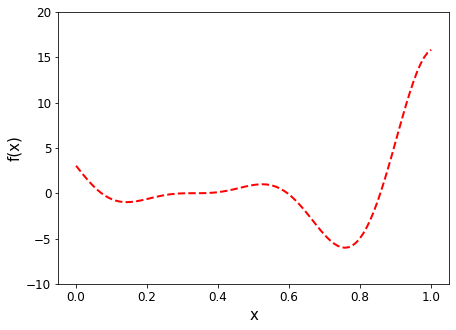

In [ ]:
# Display the function to be approximated
fig, ax = plt.subplots(figsize=(7,5))

X = np.linspace(0.0, 1, 100).reshape(-1,1)
y = Test_1D(X)

ax.plot(X, y,'r--', lw=2)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('f(x)', fontsize=15)
ax.set_ylim([-10,20]);


In [ ]:
# Training data
X_train = np.array([0.0, 0.1, 0.2, 0.4, 0.5, 0.6, 0.8, 1]).reshape(-1,1)
y_train = Test_1D(X_train)

# Testing data
X_test = np.linspace(0.0, 1, 100).reshape(-1,1)
y_test = Test_1D(X_test)

In [ ]:
# GP model training
GP = GaussianProcess(n_restarts=10, optimizer='L-BFGS-B')
GP.fit(X_train, y_train)

# GP model predicting
y_pred, y_pred_SSqr = GP.predict(X_test)

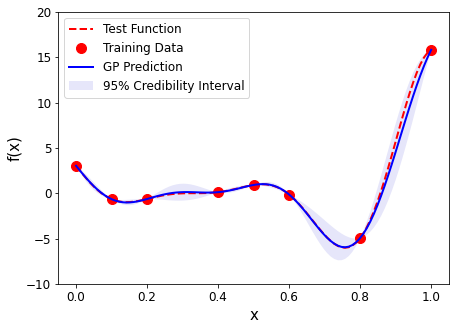

In [ ]:
fig, ax = plt.subplots(figsize=(7,5))
ax.plot(X_test,y_test,'r--',linewidth=2,label='Test Function')
ax.plot(X_train,y_train,'ro',markerfacecolor='r', markersize=10, label='Training Data')
ax.plot(X_test,y_pred,'b-', lw=2, label='GP Prediction')
ax.fill_between(X_test.flatten(), y_pred-1.96*np.sqrt(y_pred_SSqr), 
                y_pred+1.96*np.sqrt(y_pred_SSqr),
                facecolor='lavender',label='95% Credibility Interval')
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('f(x)', fontsize=15)
ax.set_ylim([-10,20])
ax.legend(loc="upper left",prop={'size': 12});

## Test function (2D) 

In [ ]:
def Test_2D(X):
    """2D Test Function"""
    
    y = (1-X[:,0])**2 + 100*(X[:,1]-X[:,0]**2)**2
    
    return y

\begin{equation}
y = (1-x_1)^2 + 100(x_2-x_1^2)^2, \: x_1 \in [-2, 2], x_2 \in [-1, 3]
\end{equation}

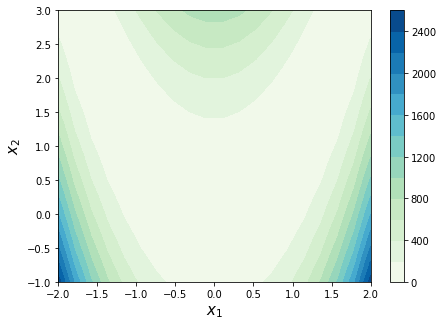

In [ ]:
# Visualizing the test function
X1 = np.linspace(-2, 2, 20)
X2 = np.linspace(-1, 3, 20)
X1, X2 = np.meshgrid(X1, X2)
X = np.hstack((X1.reshape(-1,1), X2.reshape(-1,1)))
y = Test_2D(X)

fig, ax = plt.subplots(figsize=(7,5))
h = ax.contourf(X1, X2, y.reshape(20,-1), levels=15, cmap='GnBu')
ax.set_xlabel(r'$x_1$', fontsize=15)
ax.set_ylabel(r'$x_2$', fontsize=15)
plt.colorbar(h);

In [ ]:
# Training data
sample_num = 25
lb, ub = np.array([-2, -1]), np.array([2, 3])
X_train = (ub-lb)*lhs(2, samples=sample_num) + lb

# Compute labels
y_train = Test_2D(X_train).reshape(-1,1)

# Test data
X1 = np.linspace(-2, 2, 20)
X2 = np.linspace(-1, 3, 20)
X1, X2 = np.meshgrid(X1, X2)
X_test = np.hstack((X1.reshape(-1,1), X2.reshape(-1,1)))
y_test = Test_2D(X_test)

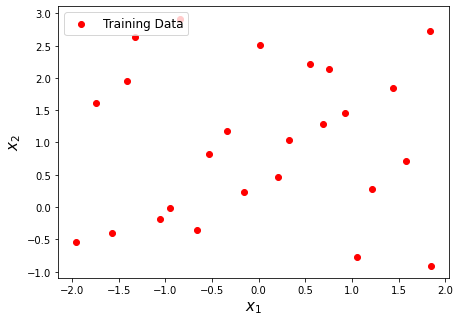

In [ ]:
# Vislauzing training samples
fig, ax = plt.subplots(figsize=(7,5))
ax.scatter(X_train[:,0], X_train[:,1], c='r', label='Training Data')
ax.set_xlabel(r'$x_1$', fontsize=15)
ax.set_ylabel(r'$x_2$', fontsize=15)
ax.legend(loc="upper left",prop={'size': 12});

In [ ]:
# GP model training
pipe = Pipeline([('scaler', MinMaxScaler()), 
         ('GP', GaussianProcess(n_restarts=10, optimizer='L-BFGS-B'))])
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('GP', <__main__.GaussianProcess object at 0x7f9a2ec6e750>)])

In [ ]:

# GP model predicting
y_pred, y_pred_SSqr = pipe.predict(X_test)

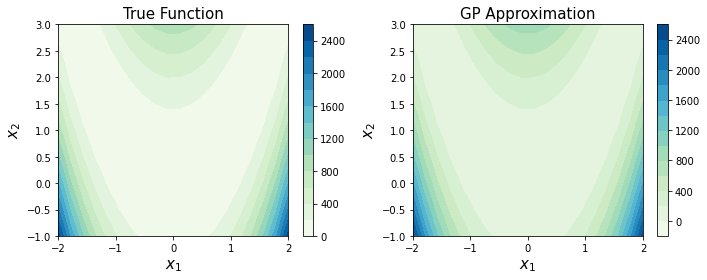

In [ ]:
# Post-processing - Contour plot
fig, ax = plt.subplots(1, 2, figsize=(10,4))
title = ['True Function', 'GP Approximation']
display_y = [y_test, y_pred]

for i in range(2):
    h = ax[i].contourf(X_test[:,0].reshape(20,-1), 
                   X_test[:,1].reshape(20,-1), 
                   display_y[i].reshape(20,-1), levels=15, cmap='GnBu');
    ax[i].set_xlabel(r'$x_1$', fontsize=15)
    ax[i].set_ylabel(r'$x_2$', fontsize=15)
    ax[i].set_title(title[i], fontsize=15)
    fig.colorbar(h, ax=ax[i])
plt.tight_layout()

In [ ]:
# Assess accuracy score
pipe.score(X_test, y_test)

2.1777357816898903

## Test function (3D) 

\begin{equation}
y = \sum_{i=1}^{2} [(1-x_i)^2 + 100(x_{i+1}-x_i^2)^2], \: x_1 \in [-2, 2], x_2 \in [-1, 3], x_3 \in [-2, 2]
\end{equation}

In [ ]:
def Test_3D(X):
    """2D Test Function"""
    
    y = (1-X[:,0])**2 + 100*(X[:,1]-X[:,0]**2)**2 + \
        (1-X[:,1])**2 + 100*(X[:,2]-X[:,1]**2)**2
    
    return y

In [ ]:
# Test data
lb, ub = np.array([-2, -1, -2]), np.array([2, 3, 2])
X_test = (ub-lb)*lhs(3, samples=500) + lb
y_test = Test_3D(X_test)

In [ ]:
# Train data
X_train = (ub-lb)*lhs(3, samples=50) + lb
y_train = Test_3D(X_train).reshape(-1,1)

In [ ]:
# GP model training
pipe = Pipeline([('scaler', MinMaxScaler()), 
         ('GP', GaussianProcess(n_restarts=40, optimizer='L-BFGS-B'))])
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('GP', <__main__.GaussianProcess object at 0x7f9a2e9b8e90>)])

In [ ]:
# Assess accuracy score
pipe.score(X_test, y_test)

11.355598443548276

# Síntesis

Un proceso gaussiano (GP) es una distribución de probabilidad sobre posibles funciones que se ajustan a un conjunto de puntos. 

Las GP son modelos no paramétricos que modelan la función directamente. Así, la GP proporciona una distribución (con incertidumbre) para el valor de la predicción en lugar de un solo valor como predicción. En el aprendizaje de robots, la cuantificación de la incertidumbre puede ser muy valiosa para lograr un proceso de aprendizaje eficiente. Las áreas con menos certeza deben ser exploradas a continuación. Esta es la idea principal de la optimización bayesiana.

Además, se pueden añadir conocimientos previos y especificaciones sobre la forma del modelo mediante la selección de diferentes funciones del núcleo.

Los priores pueden especificarse en función de criterios como si el modelo es suave, si es disperso, si puede cambiar drásticamente y si debe ser diferenciable.


Debido a la complejidad del cálculo y al consumo de memoria, la GP estándar se agota rápidamente cuando hay más de 5000 puntos de datos para la CPU y 13000 para la GPU. Para grandes conjuntos de datos, se necesita una GP **espaciosa**. 


La GPR es computacionalmente cara en espacios de alta dimensión (características de más de unas pocas docenas) debido al hecho de que utiliza las muestras/características completas para hacer las predicciones. 

Cuantas más observaciones, más cálculos se necesitan para las predicciones. Es preferible un paquete que incluya implementaciones de algoritmos de última generación para la implementación eficiente de tareas complejas de GPR.




Hay varios paquetes o marcos disponibles



- Uno ligero es [sklearn.gaussian_process](https://scikit-learn.org/stable/modules/gaussian_process.html)



- GPy utiliza NumPy para realizar todos sus cálculos. Para tareas que no requieren cálculos pesados e implementaciones de algoritmos muy actualizadas, GPy es suficiente y el más estable. [GPy](https://sheffieldml.github.io/GPy/). 

- es otro framework que proporciona aceleración en la GPU a través de **PyTorch**. Contiene algoritmos de GP muy actualizados. Al igual que GPflow, GPyTorch proporciona gradientes automáticos. Así que los modelos complejos, como la incrustación de NNs profundas en modelos de GP, pueden ser desarrollados más fácilmente. [GPyTorch](https://gpytorch.ai/) 


Tutoriales de GPR de [GPyTorch](https://github.com/jwangjie/gpytorch/blob/master/examples/01_Exact_GPs/Simple_GP_Regression.ipynb) y [GPflow](https://github.com/jwangjie/gpytorch/blob/master/examples/01_Exact_GPs/Simple_GP_Regression_GPflow.ipynb). 


# GPR (tensorflow & .csv)

Modelo básico de regresión GP (probabilidad gaussiana)
Este cuaderno muestra los diferentes pasos para crear y utilizar un modelo de regresión GP estándar, incluyendo

- Leer y formatear los datos
- Elección de una función kernel
- Elección de una función de media (opcional)
- Crear el modelo
- Ver, obtener y establecer los parámetros del modelo
- Optimización de los parámetros del modelo
- Hacer predicciones

Instalación de paquetes

Los paquetes gpflow == 2.0.1 y tensorflow-gpu == 2.1.0 son necesarios para ejecutar los códigos. Pueden ser instalados rápidamente dentro de Colab o en la máquina local. La instalación de Colab puede producir algunos errores después de ejecutar las dos líneas de comando siguientes. Si este es el caso, vuelva a ejecutarlas de nuevo

In [40]:
# COMMENT this if not used in colab
!pip3 install tensorflow
!pip3 install gpflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 444 kB 15.0 MB/s 
     |████████████████████████████████| 104 kB 69.9 MB/s 


In [41]:
import gpflow
import numpy as np
import matplotlib
import tensorflow as tf
from gpflow.utilities import print_summary


# The lines below are specific to the notebook format
%matplotlib inline
matplotlib.rcParams["figure.figsize"] = (12, 6)
plt = matplotlib.pyplot

# Rerun `!pip3 install tensorflow==2.1` and `!pip3 install gpflow` above once or twice if receive `gast<0.3,>=0.2.2` import errors. 

/usr/local/lib/python3.7/dist-packages/gpflow/experimental/utils.py:43: UserWarning: You're calling gpflow.experimental.check_shapes.decorator.check_shapes which is considered *experimental*. Expect: breaking changes, poor documentation, and bugs.
  f"You're calling {name} which is considered *experimental*."
/usr/local/lib/python3.7/dist-packages/gpflow/experimental/utils.py:43: UserWarning: You're calling gpflow.experimental.check_shapes.inheritance.inherit_check_shapes which is considered *experimental*. Expect: breaking changes, poor documentation, and bugs.
  f"You're calling {name} which is considered *experimental*."


In [42]:
plt.rcParams['figure.dpi'] = 600
plt.rcParams['savefig.format'] = 'pdf'
plt.rcParams['xtick.labelsize']=20
plt.rcParams['ytick.labelsize']=20

X e Y denotan los valores de entrada y salida. NOTA: X e Y deben ser matrices NumPy bidimensionales, N×1 o N×D , donde D es el número de dimensiones/características de entrada, con el mismo número de filas que N (una por cada punto de datos):

In [43]:

import pandas as pd
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [44]:
data = pd.read_csv ('/content/drive/MyDrive/Colab Notebooks/Data/Simple_GP_Regression_GPflow_regression_1D.csv')
data.head()

,8.658165855998894989e-01,1.525531433714437224e+00
0,0.666170,3.643420
1,0.804922,3.010886
2,0.771430,3.774442
3,0.147905,3.368764
4,0.026332,3.868971


(-0.1, 1.1, -5.0, 12.0)

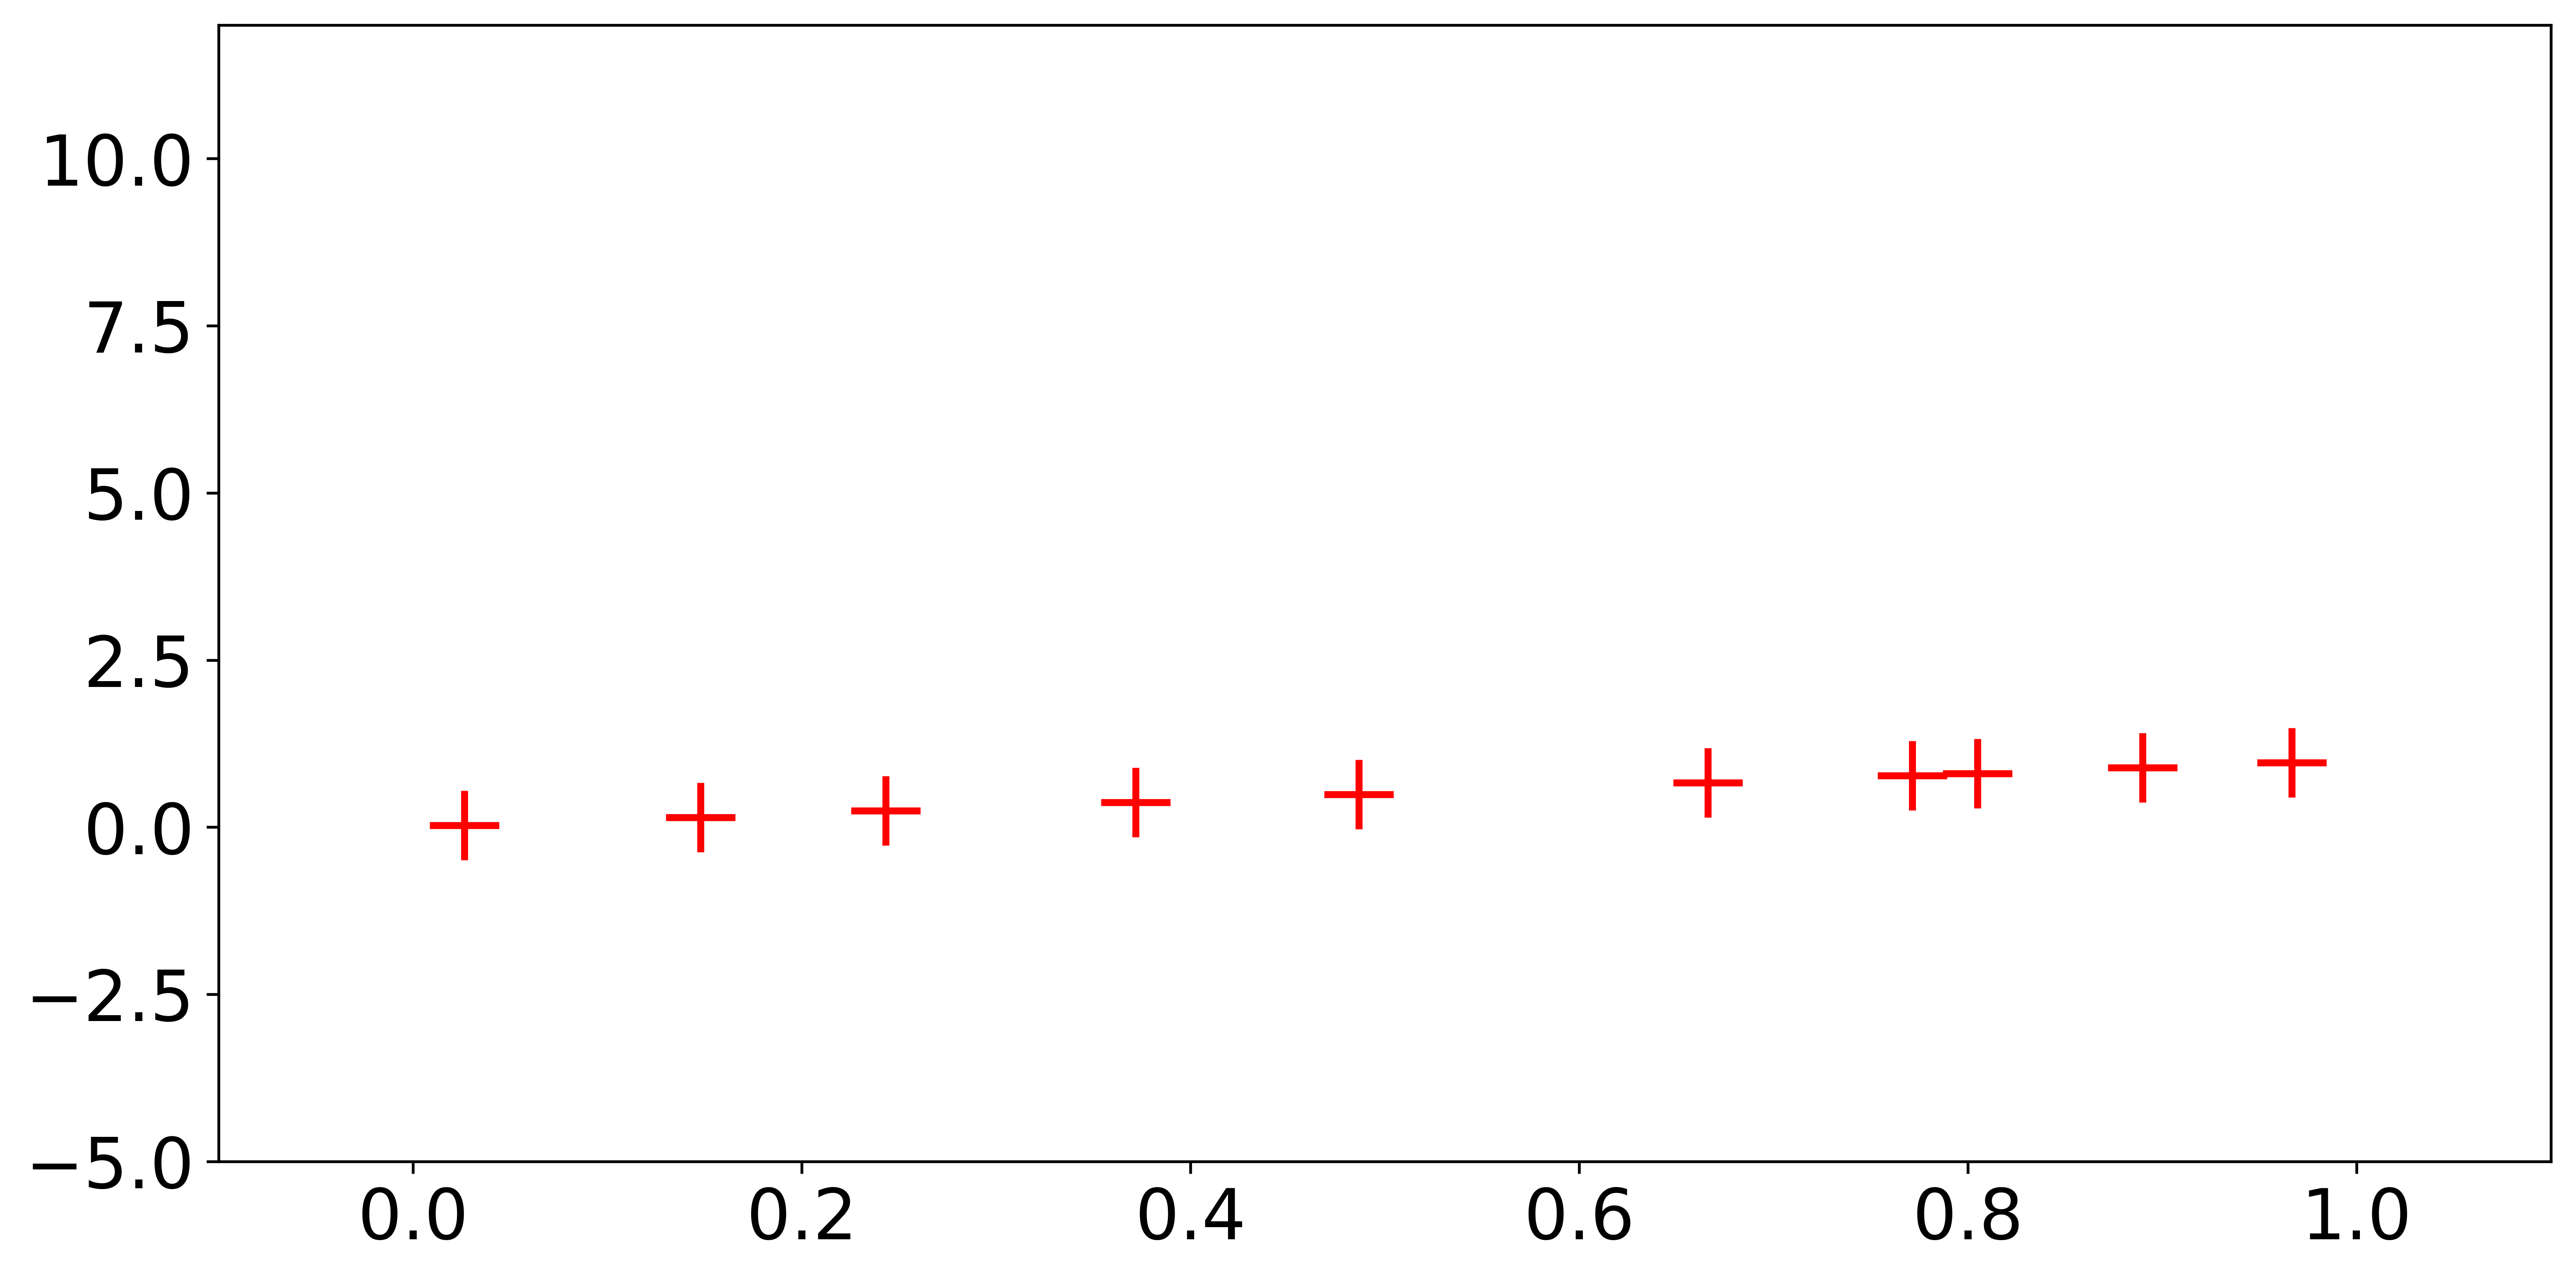

In [45]:
X = data.iloc[:,:-1].values
Y = data.iloc[:,:-1].values


_ = plt.plot(X, Y, "r+", markersize=20, markeredgewidth=2)
#plt.show()
plt.axis([-.1, 1.1, -5, 12])

Consideraremos el siguiente modelo probabilístico:

\begin{equation}
Y_i = f(X_i) + \varepsilon_i\,,
\end{equation}
where $f \sim \mathcal{GP}(\mu(\cdot), k(\cdot, \cdot'))$, and $\varepsilon \sim \mathcal{N}(0, \tau^2 I)$.



Elegir un kernel
Hay varios kernels (funciones de covarianza) implementados en GPflow. Puede combinarlos fácilmente para crear otros nuevos (ver Manipulación de kernels). También puede implementar nuevas funciones de covarianza, como se muestra en el cuaderno de diseño de Kernel. Aquí, utilizaremos una simple:

In [46]:
k = gpflow.kernels.RBF()

/usr/local/lib/python3.7/dist-packages/gpflow/experimental/utils.py:43: UserWarning: You're calling gpflow.experimental.check_shapes.checker.ShapeChecker.__init__ which is considered *experimental*. Expect: breaking changes, poor documentation, and bugs.
  f"You're calling {name} which is considered *experimental*."


Para obtener núcleos más avanzados, consulte el cuaderno de núcleos avanzados (incluidos los núcleos definidos en subespacios). Se puede obtener un resumen del núcleo mediante

In [47]:
print_summary(k)

╒═════════════════════════════════╤═══════════╤═════════════╤═════════╤═════════════╤═════════╤═════════╤═════════╕
│ name                            │ class     │ transform   │ prior   │ trainable   │ shape   │ dtype   │   value │
╞═════════════════════════════════╪═══════════╪═════════════╪═════════╪═════════════╪═════════╪═════════╪═════════╡
│ SquaredExponential.variance     │ Parameter │ Softplus    │         │ True        │ ()      │ float64 │       1 │
├─────────────────────────────────┼───────────┼─────────────┼─────────┼─────────────┼─────────┼─────────┼─────────┤
│ SquaredExponential.lengthscales │ Parameter │ Softplus    │         │ True        │ ()      │ float64 │       1 │
╘═════════════════════════════════╧═══════════╧═════════════╧═════════╧═════════════╧═════════╧═════════╧═════════╛


## Elegir una función media
Es común elegir $\mu = 0$, que es el valor por defecto de GPflow.

Sin embargo, si hay un patrón claro (como un valor medio de `Y` que está muy lejos de 0, o una tendencia lineal en los datos), las funciones de media pueden ser beneficiosas. En el módulo `gpflow.mean_functions` se proporcionan algunas sencillas.

Así es como se define una función de media lineal:

`meanf = gpflow.mean_functions.Linear()`

## Construir un modelo
Un modelo GPflow se crea instanciando una de las clases de modelo GPflow, en este caso GPR. Haremos un kernel `k` e instanciaremos un objeto GPR usando los datos generados y el kernel. También estableceremos la varianza de la probabilidad a una estimación inicial razonable.

In [48]:
m = gpflow.models.GPR(data=(X, Y), kernel=k, mean_function=None)

In [50]:
print_summary(m) #Resumen del modelo

╒═════════════════════════╤═══════════╤══════════════════╤═════════╤═════════════╤═════════╤═════════╤═════════╕
│ name                    │ class     │ transform        │ prior   │ trainable   │ shape   │ dtype   │   value │
╞═════════════════════════╪═══════════╪══════════════════╪═════════╪═════════════╪═════════╪═════════╪═════════╡
│ GPR.kernel.variance     │ Parameter │ Softplus         │         │ True        │ ()      │ float64 │       1 │
├─────────────────────────┼───────────┼──────────────────┼─────────┼─────────────┼─────────┼─────────┼─────────┤
│ GPR.kernel.lengthscales │ Parameter │ Softplus         │         │ True        │ ()      │ float64 │       1 │
├─────────────────────────┼───────────┼──────────────────┼─────────┼─────────────┼─────────┼─────────┼─────────┤
│ GPR.likelihood.variance │ Parameter │ Softplus + Shift │         │ True        │ ()      │ float64 │       1 │
╘═════════════════════════╧═══════════╧══════════════════╧═════════╧═════════════╧═════════╧════

Las dos primeras líneas corresponden a los parámetros del núcleo, y la tercera da el parámetro de verosimilitud (la varianza del ruido τ2 en nuestro modelo).

Puede acceder a esos valores y ajustarlos manualmente a conjeturas iniciales razonables. Por ejemplo:

In [51]:
m.likelihood.variance.assign(0.01)  
m.kernel.lengthscales.assign(0.3)

# l = 0.03, 0.2, 0.6

<tf.Variable 'UnreadVariable' shape=() dtype=float64, numpy=-1.0502256128148466>

Estas conjeturas iniciales son **importantes** para la siguiente optimización de los hiperparámetros. Los valores por defecto $l =1$ y $\sigma =1$ pueden no estar muy lejos de los hiperparámetros adecuados, por lo que incluso después de la optimización, $l$ y $\sigma$ siguen estando lejos del número óptimo. Esto causará un gran error en los resultados de la regresión. Esto puede ser fácilmente verificado por nuestro conjunto de datos modificados (añadido un punto en [0,487, 1,85]). Unas buenas varas iniciales son $l =0,3$ y $\sigma =0,01$， que proporcionan una escala de magnitud suficientemente correcta. 

## Graficar antes de optimizar los hiperparámetros

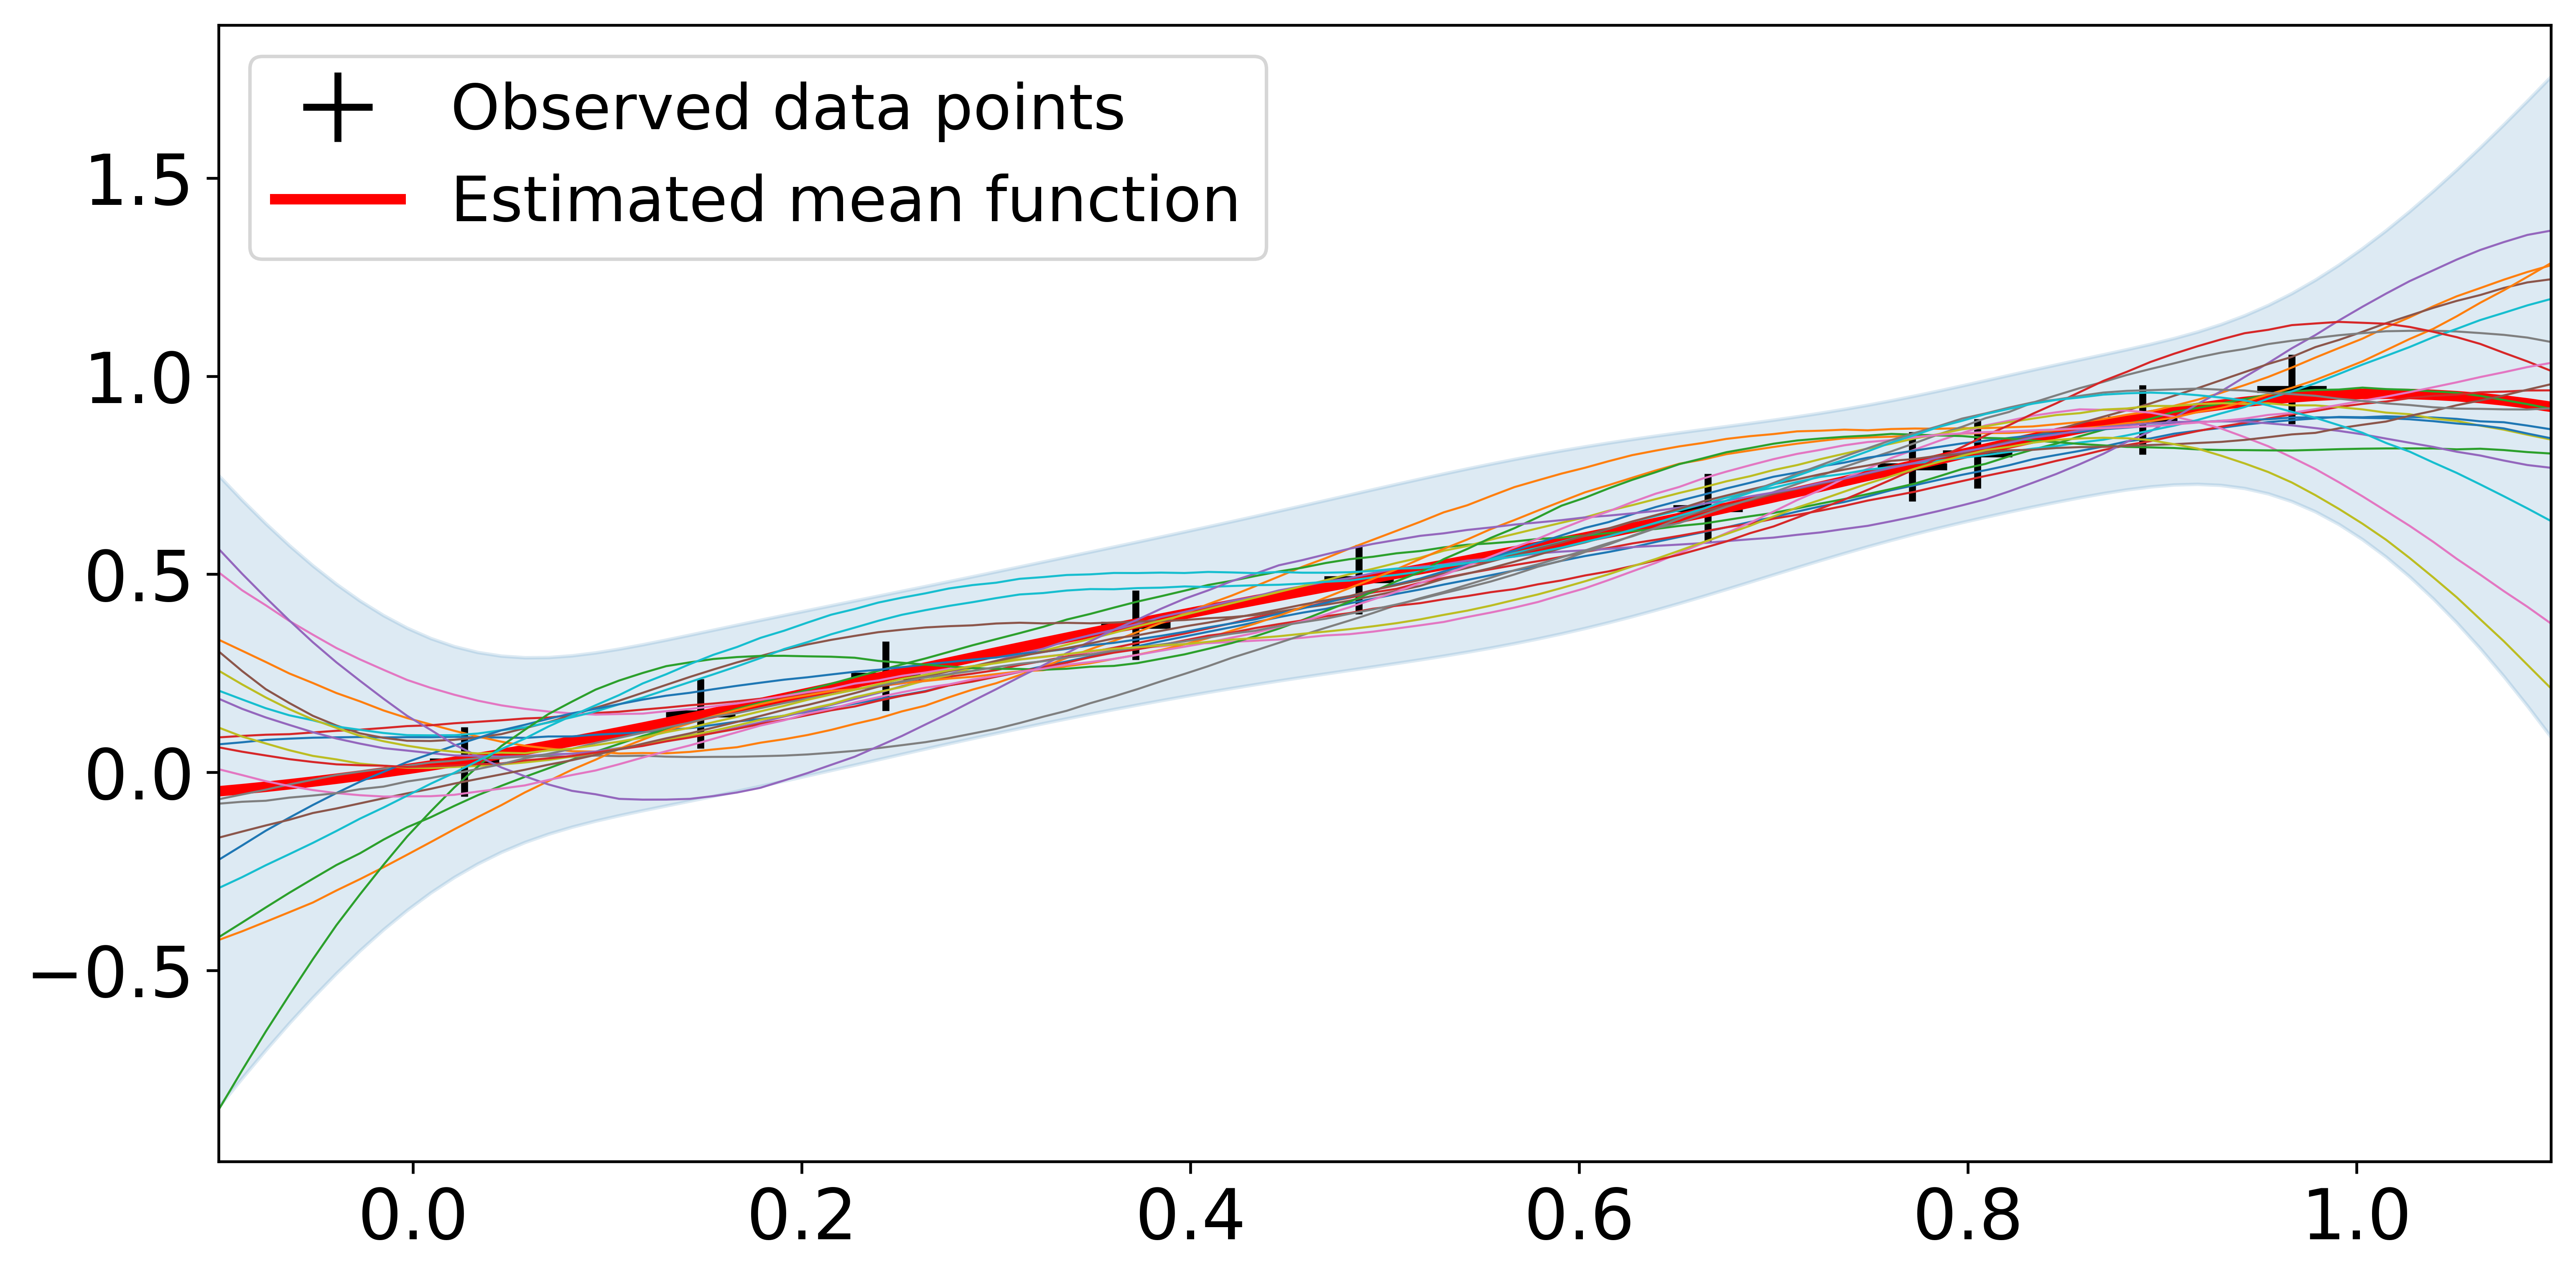

In [52]:
## generate test points for prediction
xx = np.linspace(-0.1, 1.1, 100).reshape(100, 1)  # test points must be of shape (N, D)

## predict mean and variance of latent GP at test points
mean, var = m.predict_f(xx)

## generate 10 samples from posterior
tf.random.set_seed(1)  # for reproducibility
samples = m.predict_f_samples(xx, 20)  # shape (10, 100, 1)

plt.figure(figsize=(12, 6))

plt.plot(X, Y, "k+", markersize=20, markeredgewidth=2)
plt.plot(xx, mean, "r-", lw=3)

plt.legend(['Observed data points', 'Estimated mean function'], prop={'size': 18})

plt.fill_between(xx[:,0], mean[:,0] - 3*np.sqrt(var[:,0]), mean[:,0] + 3*np.sqrt(var[:,0]), color="C0", alpha=0.15)

plt.plot(xx, samples[:, :, 0].numpy().T, linewidth=0.6)

_ = plt.xlim(-0.1, 1.1)

plt.savefig('regression_gpflow')

## Optimizar los parámetros del modelo

Para obtener predicciones significativas, es necesario ajustar los parámetros del modelo (es decir, los parámetros del kernel, la verosimilitud y la función de la media, si es aplicable) a los datos en cuestión.

Hay varios optimizadores disponibles en GPflow. Aquí utilizamos el optimizador `Scipy`, que por defecto implementa el algoritmo L-BFGS-B. (Puede seleccionar otros algoritmos utilizando el argumento de la palabra clave `method=` a su método `minimize`; ver [la documentación de SciPy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html) para los detalles de las opciones disponibles).

In [53]:
opt = gpflow.optimizers.Scipy()

Para entrenar el modelo, necesitamos maximizar la probabilidad marginal logarítmica. Los modelos de GPflow definen una pérdida de entrenamiento que puede pasarse al método de minimización de un optimizador; en este caso es simplemente la probabilidad marginal logarítmica negativa. También necesitamos especificar las variables a entrenar con m.trainable_variables, y el número de iteraciones


In [54]:
opt_logs = opt.minimize(m.training_loss, m.trainable_variables, options=dict(maxiter=100))
print_summary(m)


╒═════════════════════════╤═══════════╤══════════════════╤═════════╤═════════════╤═════════╤═════════╤══════════╕
│ name                    │ class     │ transform        │ prior   │ trainable   │ shape   │ dtype   │    value │
╞═════════════════════════╪═══════════╪══════════════════╪═════════╪═════════════╪═════════╪═════════╪══════════╡
│ GPR.kernel.variance     │ Parameter │ Softplus         │         │ True        │ ()      │ float64 │ 102.994  │
├─────────────────────────┼───────────┼──────────────────┼─────────┼─────────────┼─────────┼─────────┼──────────┤
│ GPR.kernel.lengthscales │ Parameter │ Softplus         │         │ True        │ ()      │ float64 │  17.4793 │
├─────────────────────────┼───────────┼──────────────────┼─────────┼─────────────┼─────────┼─────────┼──────────┤
│ GPR.likelihood.variance │ Parameter │ Softplus + Shift │         │ True        │ ()      │ float64 │   0      │
╘═════════════════════════╧═══════════╧══════════════════╧═════════╧═════════════╧══════

Observe cómo ha cambiado la columna de valores.

El óptimo local encontrado por Máxima Verosimilitud podría no ser el deseado (por ejemplo, podría estar sobreajustado o ser demasiado suave). Esto depende de los valores iniciales de los hiperparámetros, y es específico de cada conjunto de datos. 

Como alternativa a la Máxima Verosimilitud, también está disponible [Markov Chain Monte Carlo (MCMC)](../advanced/mcmc.ipynb).

- Para hacer predicciones

Ahora podemos utilizar el modelo para hacer algunas predicciones en los nuevos puntos `Xnew`. Podemos estar interesados en predecir dos cantidades diferentes: los valores de la función latente `f(Xnew)` (la señal denotada), o los valores de las nuevas observaciones `y(Xnew)`(señal + ruido).

Como se trata de modelos probabilísticos gaussianos, las predicciones suelen producir una media y una varianza como salida. 

Alternativamente, se pueden obtener muestras de `f(Xnew)` o la densidad logarítmica de los nuevos puntos de datos `(Xnew, Ynew)`.

Los modelos GPflow tienen varios métodos de predicción:

- m.predict_f` devuelve la media y la varianza marginal de $f$ en los puntos `Xnew`.

 - m.predict_f` con el argumento `full_cov=True` devuelve la media y la matriz de covarianza completa de $f$ en los puntos `Xnew`.

 - `m.predict_f_samples` devuelve muestras de la función latente.

 - m.predict_y` devuelve la media y la varianza de un nuevo punto de datos (es decir, incluye la varianza del ruido).

 - m.predict_log_density` devuelve la densidad logarítmica de las observaciones `Ynew` en `Xnew`.

Utilizamos `predict_f` y `predict_f_samples` para trazar intervalos de confianza del 95% y muestras de la distribución posterior.

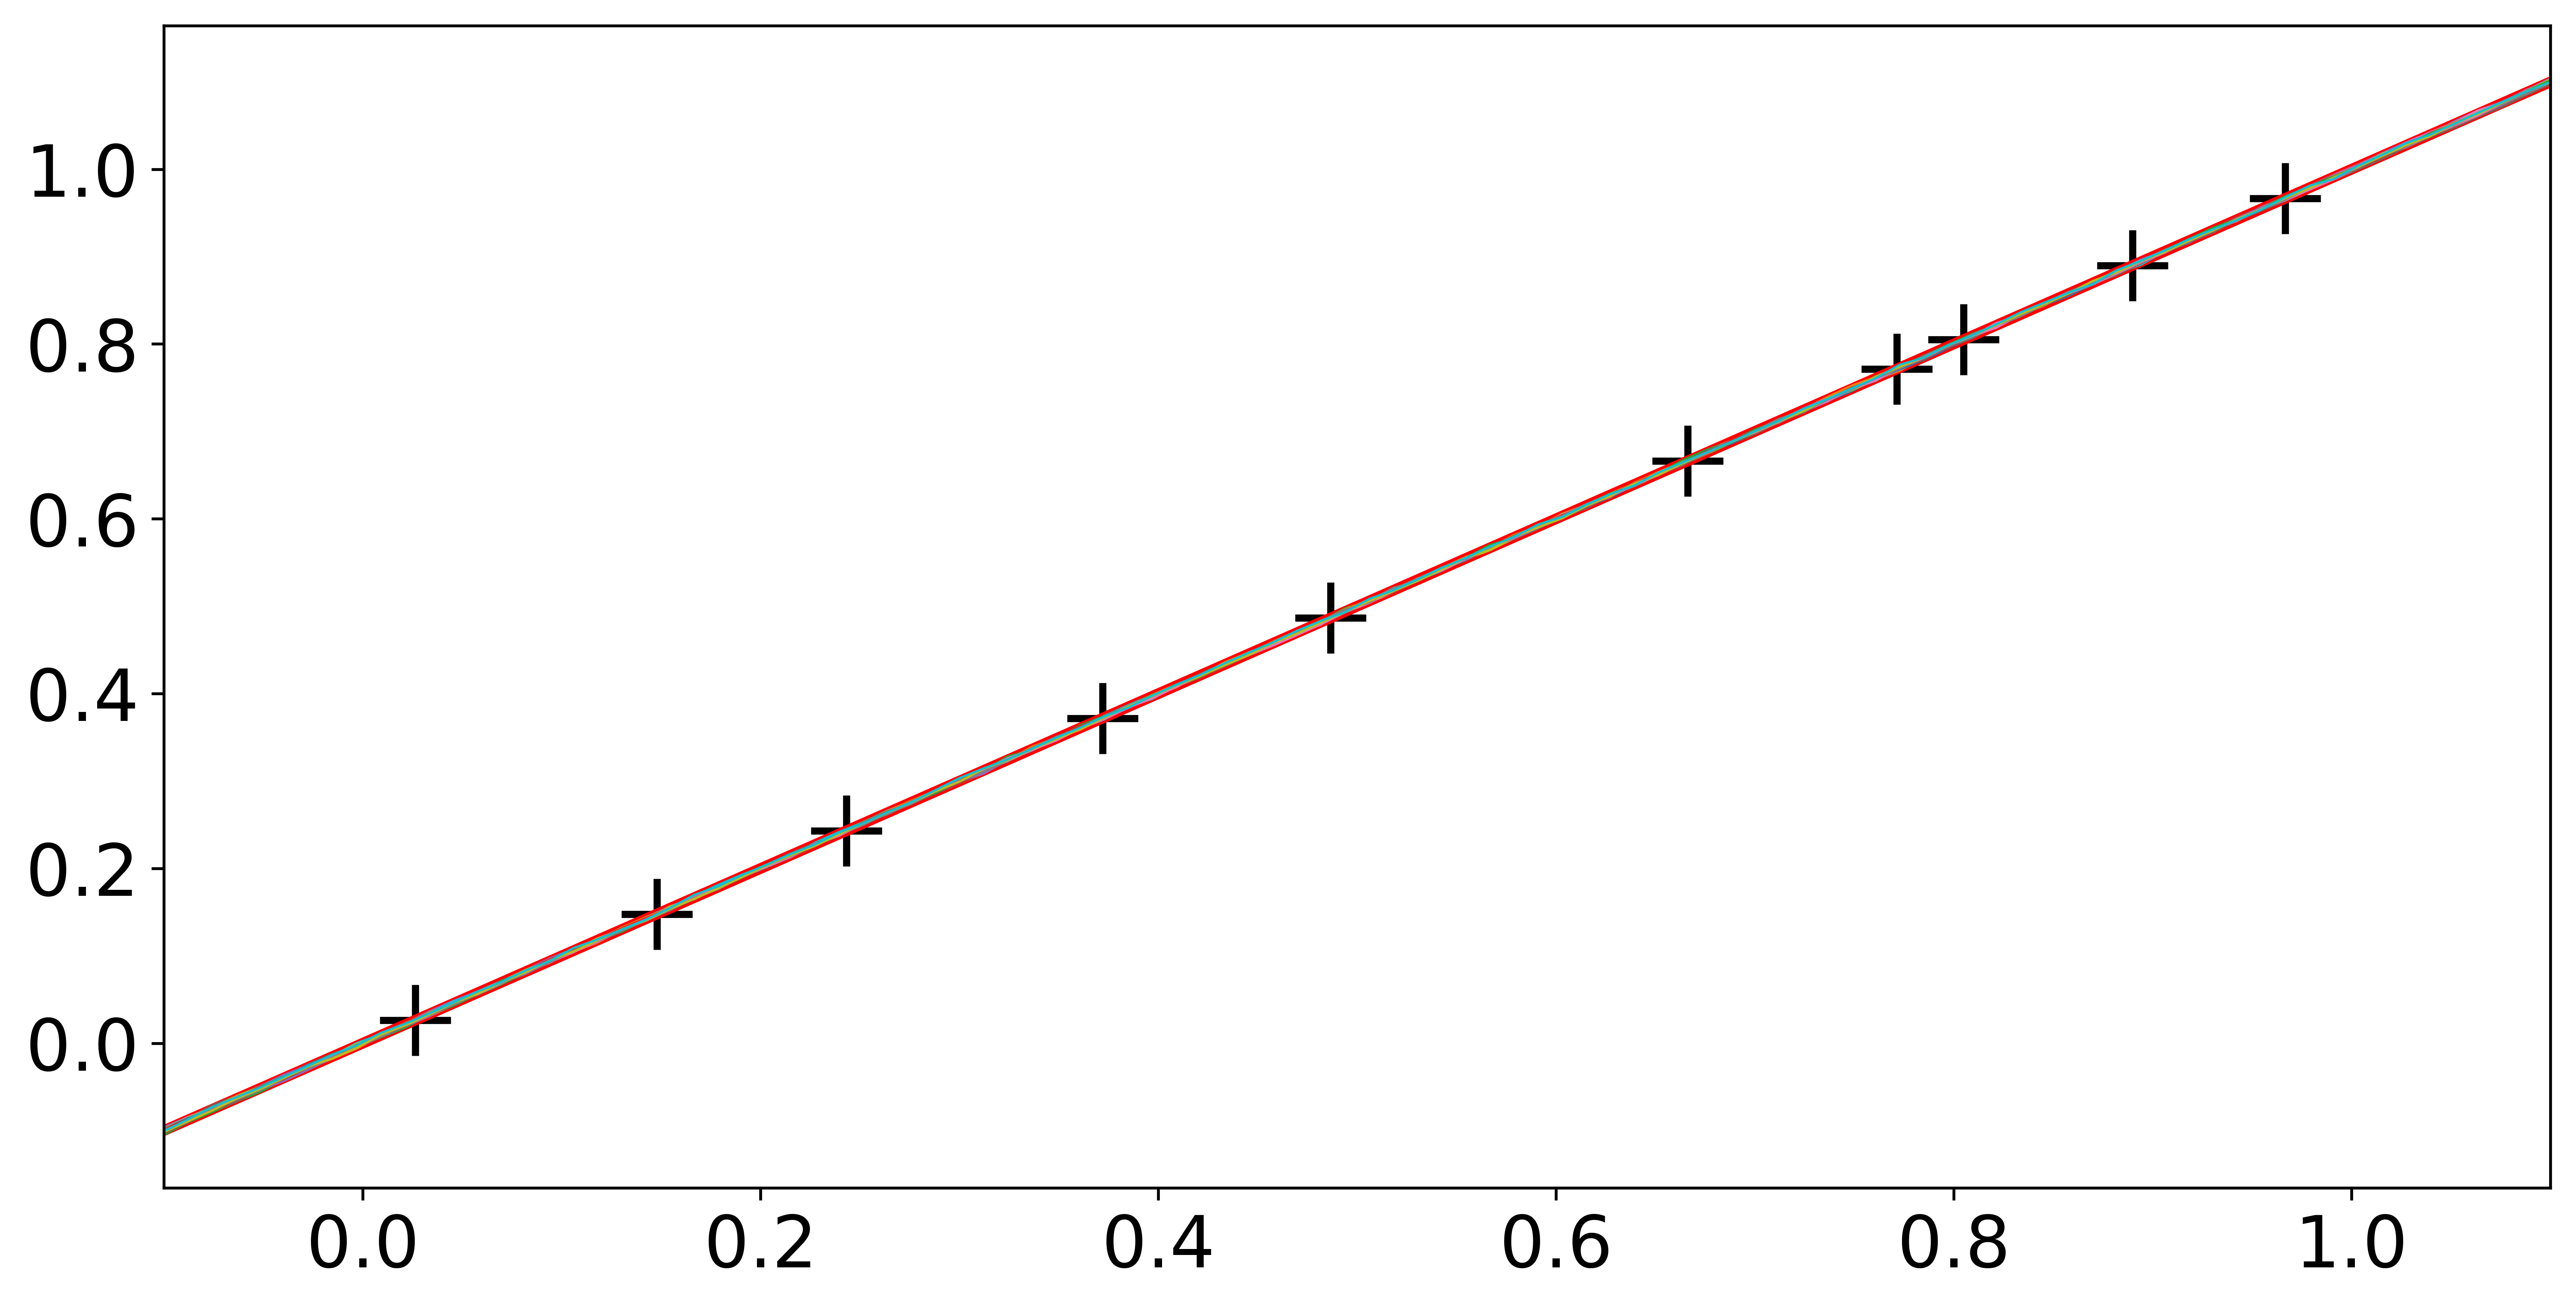

In [55]:
## generate test points for prediction
xx = np.linspace(-0.1, 1.1, 100).reshape(100, 1)  # test points must be of shape (N, D)

## predict mean and variance of latent GP at test points
mean, var = m.predict_f(xx)

## generate 10 samples from posterior
tf.random.set_seed(1)  # for reproducibility
samples = m.predict_f_samples(xx, 30)  # shape (10, 100, 1)

## plot
plt.figure(figsize=(12, 6))
plt.plot(X, Y, "k+", markersize=20, markeredgewidth=2)
plt.plot(xx, mean, "r-", lw=3)

plt.fill_between(
    xx[:, 0],
    mean[:, 0] - 1.96 * np.sqrt(var[:, 0]),
    mean[:, 0] + 1.96 * np.sqrt(var[:, 0]),
    color="C0",
    alpha=0.15,
)
plt.plot(xx, samples[:, :, 0].numpy().T, linewidth=0.6)
_ = plt.xlim(-0.1, 1.1)

plt.savefig('regression')

In [56]:
print_summary(m)

╒═════════════════════════╤═══════════╤══════════════════╤═════════╤═════════════╤═════════╤═════════╤══════════╕
│ name                    │ class     │ transform        │ prior   │ trainable   │ shape   │ dtype   │    value │
╞═════════════════════════╪═══════════╪══════════════════╪═════════╪═════════════╪═════════╪═════════╪══════════╡
│ GPR.kernel.variance     │ Parameter │ Softplus         │         │ True        │ ()      │ float64 │ 102.994  │
├─────────────────────────┼───────────┼──────────────────┼─────────┼─────────────┼─────────┼─────────┼──────────┤
│ GPR.kernel.lengthscales │ Parameter │ Softplus         │         │ True        │ ()      │ float64 │  17.4793 │
├─────────────────────────┼───────────┼──────────────────┼─────────┼─────────────┼─────────┼─────────┼──────────┤
│ GPR.likelihood.variance │ Parameter │ Softplus + Shift │         │ True        │ ()      │ float64 │   0      │
╘═════════════════════════╧═══════════╧══════════════════╧═════════╧═════════════╧══════

### Regresión GP en dimensiones superiores

Cambia poco cuando el espacio de entrada tiene más de una dimensión. Por defecto, el `lengthscales` es un parámetro isotrópico (escalar). Generalmente se recomienda permitir afinar una escala de longitud diferente para cada dimensión (Automatic Relevance Determination, ARD): simplemente inicialice `lengthscales` con un array de longitud $D$ correspondiente a la dimensión de entrada de `X`. 